In [187]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
from itertools import combinations

In [188]:
# 1

In [195]:
X = np.array([
[ 1.22401313, 2.30868478, 3.03636353, 2.69287214],
[-0.18757272, 1.30337355, 5.12093014, 3.46363202],
[-0.81094525, 1.82463398, 5.79686488, 1.86159445],
[ 0.75129018, 2.67392052, 3.65529809, 1.66746094],
[ 0.00972362, 1.97367255, 2.50594319, 1.69755173],
[-0.62972637, 0.77750764, 2.84124027, 4.54410559],
[ 2.29536229, 1.81206697, 1.95026215, 1.51874636],
[ 0.0920418 , 2.26971361, 7.47708735, 2.61081203],
[ 2.39252799, 3.17563985, 3.61420599, 5.10773362],
[ 0.54983815, 2.87988651, 1.65752765, 1.59635987]])

y = np.array([ 9.26193358, 9.700363 , 8.67214805, 8.74796974, 6.18689108,
7.53312713, 7.57643777, 12.44965478, 14.29010746, 6.68361218])

In [196]:
def summ(samples):
    return ((samples - samples.mean()) ** 2).sum()

def coef(x, y):
    o = np.ones((x.shape[0], 1))
    x = np.hstack([o, x])
    xtx = x.T.dot(x)
    xtx_inv = np.linalg.inv(xtx)
    b = xtx_inv.dot(x.T).dot(y)
    z = x.dot(b)
    E = y-z
    return 1 - summ(E) / summ(y)

In [199]:
for i, j in combinations(range(X.shape[1]), 2):
    r = coef(X[:, [i, j]], y)
    print(f'{i} {j} - {r}')

0 1 - 0.18113594742585215
0 2 - 0.7634246238793152
0 3 - 0.4532966783144077
1 2 - 0.547948273403901
1 3 - 0.6062055761129932
2 3 - 0.622441987650532


In [205]:
# 2

In [206]:
co = coef(X[:, [0, 2]], y)
S = (co / 2) / ((1 - co) / (10 - 2 - 1))
S

11.29443912292265

In [207]:
alpha = 0.05
t = stats.f.ppf(1-alpha, 2, 7)
t

4.73741412777588

In [ ]:
#попало в критическую область, значит значимое

In [158]:
# 3

In [159]:
A = np.array(77 * [1] + (2509 - 77) * [0])
B = np.array(60 * [1] + (1465 - 60) * [0])
stats.ttest_ind(A, B, equal_var=False)

Ttest_indResult(statistic=-1.6504551408398205, pvalue=0.09896479217925898)

In [160]:
# отличие не значимое, об этом можно судить с уверенностью в 90.1%

In [161]:
# 4

In [162]:
dict_set = {
    "x1": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y1": [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68],
    "x2": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y2": [9.14, 8.14, 8.74, 8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74],
    "x3": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y3": [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73],
    "x4": [8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 19.0, 8.0, 8.0, 8.0],
    "y4": [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89]
}

In [163]:
for key, value in dict_set.items():
    print(key)
    print(f'выборочное среднее: {np.array(value).mean()}')
    print(f'дисперсия: {np.array(value).var(ddof=1)}')
    print(('*')*10)

x1
выборочное среднее: 9.0
дисперсия: 11.0
**********
y1
выборочное среднее: 7.500909090909093
дисперсия: 4.127269090909091
**********
x2
выборочное среднее: 9.0
дисперсия: 11.0
**********
y2
выборочное среднее: 7.50090909090909
дисперсия: 4.127629090909091
**********
x3
выборочное среднее: 9.0
дисперсия: 11.0
**********
y3
выборочное среднее: 7.5
дисперсия: 4.12262
**********
x4
выборочное среднее: 9.0
дисперсия: 11.0
**********
y4
выборочное среднее: 7.500909090909091
дисперсия: 4.123249090909091
**********


коэффициенты линейной регрессии: (3.0000909090909094, 0.5000909090909093)
коэффициент корреляции Пирсона: 0.81642051634484
**********
коэффициенты линейной регрессии: (3.000909090909089, 0.5000000000000001)
коэффициент корреляции Пирсона: 0.8162365060002428
**********
коэффициенты линейной регрессии: (3.002454545454544, 0.49972727272727285)
коэффициент корреляции Пирсона: 0.8162867394895984
**********
коэффициенты линейной регрессии: (3.0017272727272735, 0.49990909090909086)
коэффициент корреляции Пирсона: 0.8165214368885028
**********


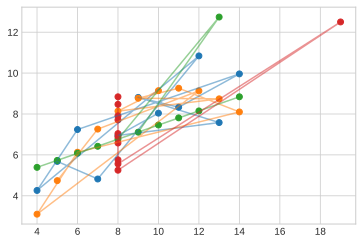

In [164]:
for i in range(len(dict_set)):
    if i%2==0:
        list1 = np.array(list(dict_set.values()))[i]
        list2 = np.array(list(dict_set.values()))[i+1]
        b1 = np.cov(list1, list2, ddof=1)[0, 1] / np.var(list1, ddof=1)
        b0 = list2.mean() - b1 * list1.mean()

        print(f'коэффициенты линейной регрессии: {b0, b1}')
        print(f'коэффициент корреляции Пирсона: {np.corrcoef(list1, list2)[0, 1]}')
        print(('*')*10)

        plt.style.use('seaborn-whitegrid')
        %config InlineBackend.figure_formats = ['svg']

        ox = list1
        oy = b0 + b1 * ox

        plt.scatter(list1, list2)
        plt.plot(list1, list2, alpha=0.5)
